<a href="https://colab.research.google.com/github/Ajeyanth/HousePrices/blob/main/HousesPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from google.colab import files


In [2]:
# Step 1: Upload the file
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
# Import the data
df = pd.read_csv("2018-2022.csv")
df['deed_date']=pd.to_datetime(df['deed_date'])
df=pd.DataFrame(df)
df= df.drop_duplicates(subset=['price_paid','deed_date','street','paon','saon','estate_type', 'district'])
print(df.columns.values)
df=df.loc[:,['price_paid','deed_date','street', 'postcode','property_type','estate_type', 'district']]
print(df)

df['deed_date'] = df['deed_date'].apply(lambda x: x.timestamp())
df_2= df.sort_values(by='price_paid', ascending=True)
print(df_2)

In [ ]:
df_cleaned=df_2.dropna()
print(df_cleaned)
print(df_cleaned.isna().any())


        price_paid     deed_date               street  postcode property_type  \
79792       100000  1.538352e+09        COSTER AVENUE    N4 2LD             F   
202943      100000  1.635466e+09        KNIGHTSBRIDGE  SW1X 7LJ             O   
245637      100000  1.613088e+09       EARLHAM STREET  WC2H 9LD             O   
155288      100000  1.536192e+09       CRANFIELD WALK   SE3 9EX             F   
245407      100000  1.607558e+09      PORTUGAL STREET  WC2A 2AT             O   
...            ...           ...                  ...       ...           ...   
174274     2000000  1.547597e+09  CHARLES CLOWES WALK  SW11 7AJ             F   
61167      2000000  1.581466e+09   WOODSIDE PARK ROAD   N12 8RP             O   
61168      2000000  1.581466e+09   WOODSIDE PARK ROAD   N12 8RP             O   
211637     2000000  1.534723e+09        TREBOVIR ROAD   SW5 9TF             F   
211245     2000000  1.638490e+09   COURTFIELD GARDENS   SW5 0PD             F   

       estate_type         

In [ ]:
print(df_cleaned['district'])

79792                    HACKNEY
202943       CITY OF WESTMINSTER
245637                    CAMDEN
155288                 GREENWICH
245407       CITY OF WESTMINSTER
                   ...          
174274                WANDSWORTH
61167                     BARNET
61168                     BARNET
211637    KENSINGTON AND CHELSEA
211245    KENSINGTON AND CHELSEA
Name: district, Length: 245244, dtype: object


In [ ]:
for x in df_cleaned['district'].unique():
    if df_cleaned['district'].value_counts()[x] < 100:
        df_cleaned = df_cleaned[df_cleaned['district'] != x]

print(df_cleaned['district'])

79792                    HACKNEY
202943       CITY OF WESTMINSTER
245637                    CAMDEN
155288                 GREENWICH
245407       CITY OF WESTMINSTER
                   ...          
174274                WANDSWORTH
61167                     BARNET
61168                     BARNET
211637    KENSINGTON AND CHELSEA
211245    KENSINGTON AND CHELSEA
Name: district, Length: 245157, dtype: object


Slope: 10973141615380.959
Intercept: 922899.0711602273
R-squared: 0.0007295430020186276
P-value: 0.0454290853177858
Standard error: 5483511316730.409


<ipython-input-9-b6639430957d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kensington['deed_date'] = df_kensington['deed_date'] - df_kensington['deed_date'].min()


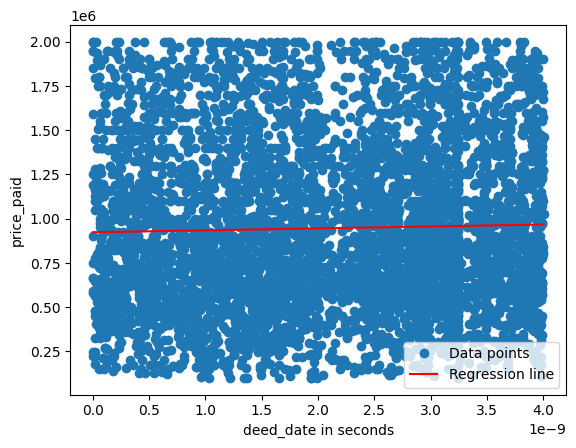

        price_paid     deed_date                   street  postcode  \
178993      395000  4.828155e-08     MORTLAKE HIGH STREET  SW14 8HW   
26859       277000  4.828155e-08              BILLET ROAD   E17 5HE   
83566      1125000  4.828155e-08           SOUTHWOOD LANE    N6 5SY   
116886      535000  4.828155e-08  WESTMINSTER BRIDGE ROAD   SE1 7XA   
38129       247630  4.828155e-08              HAMLETS WAY    E3 4LS   
...            ...           ...                      ...       ...   
152263      875000  5.228378e-08    ST JULIAN'S FARM ROAD  SE27 0RJ   
77139       282500  5.228378e-08          PALMERSTON ROAD   N22 8QT   
69605       310000  5.228378e-08              BREAM CLOSE   N17 9DQ   
224889      815000  5.228378e-08         CHAMBERLAIN ROAD   W13 9EW   
160929      628000  5.228378e-08           DAVENPORT ROAD   SE6 2AS   

       property_type estate_type              district  
178993             F           L  RICHMOND UPON THAMES  
26859              F           L 

In [ ]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Convert 'deed_date' to datetime objects
#df_cleaned['deed_date'] = pd.to_datetime(df_cleaned['deed_date'], unit='s')
df_cleaned.sort_values(by='deed_date', inplace = True)
df_cleaned['deed_date']= (pd.to_datetime(df_cleaned['deed_date']).astype(int)/(10**9))/(3.154 * 10**7)
# Calculate time elapsed in seconds since the earliest date for Kensington
df_kensington = df_cleaned[df_cleaned['district'] == 'KENSINGTON AND CHELSEA']

df_kensington['deed_date'] = df_kensington['deed_date'] - df_kensington['deed_date'].min()

# Extract the relevant columns
x = df_kensington['deed_date'].to_numpy()

y = df_kensington['price_paid'].to_numpy()

# Perform linear regression
if len(np.unique(x)) > 1:
  slope, intercept, r_value, p_value, std_err = linregress(x, y)
  print(f"Slope: {slope}")
  print(f"Intercept: {intercept}")
  print(f"R-squared: {r_value**2}")
  print(f"P-value: {p_value}")
  print(f"Standard error: {std_err}")
  # Plot the data and the regression line
  plt.plot(x, y,'o', label='Data points')
  plt.plot(x, intercept + slope*x, color='red', label='Regression line')
  plt.xlabel('deed_date in seconds')
  plt.ylabel('price_paid')
  plt.legend()
  plt.show()
  print(df_cleaned)


In [ ]:
 #new_df = pd.DataFrame({'price_paid','deed_date','street','estate_type', 'district'})
#for x in df_cleaned['deed_date'].unique():
 # x = (df_cleaned['deed_date'] - df_cleaned['deed_date'].min())
 # for y in df_cleaned['price_paid'].unique().numpy:
    #    slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [ ]:
# for district in df_cleaned['district'].unique():
#     df_district = df_cleaned[df_cleaned['district'] == district]
#     x = df_district['deed_date'].to_numpy()  # Get all deed dates for the district
#     y = df_district['price_paid'].to_numpy()  # Get all prices for the district

#     if len(np.unique(x)) > 1:  # Check if there are at least two unique dates
#         slope, intercept, r_value, p_value, std_err = linregress(x, y)
#         print(f"District: {district}")
#         print(f"Slope: {slope}")
#         print(f"Intercept: {intercept}")
#         print(f"R-squared: {r_value**2}")
#         print(f"P-value: {p_value}")
#         print(f"Standard error: {std_err}")
#         plt.plot(x, y,'o', label='Data points')
#         plt.plot(x, intercept + slope*x, color='red', label='Regression line')
#         plt.xlabel('deed_date in seconds')
#         plt.ylabel('price_paid')
#         plt.legend()
#         plt.show()


In [ ]:
for district in df_cleaned['district'].unique():
    df_district = df_cleaned[df_cleaned['district'] == district]

    for street in df_district['street'].unique():
        df_street = df_district[df_district['street'] == street]
        x = df_street['deed_date'].to_numpy()
        y = df_street['price_paid'].to_numpy()

        if len(np.unique(x)) > 1:
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            print(f"District: {district}, Street: {street}")
            print(f"Slope: {slope}")
            print(f"Intercept: {intercept}")
            print(f"R-squared: {r_value**2}")
            print(f"P-value: {p_value}")
            print(f"Standard error: {std_err}")

Streaming output truncated to the last 5000 lines.
P-value: 0.2607919769438146
Standard error: 925017412017993.4
District: LEWISHAM, Street: WALDRAM PLACE
Slope: -3681139122315675.0
Intercept: 185059243.6974831
R-squared: 1.0
P-value: 0.0
Standard error: 0.0
District: LEWISHAM, Street: EDWARD STREET
Slope: 74121467976212.9
Intercept: -3467207.034680278
R-squared: 0.2952861037807436
P-value: 0.26512606905663716
Standard error: 57253089781757.38
District: LEWISHAM, Street: FOREST HILL ROAD
Slope: 279960317460317.16
Intercept: -13077127.819548858
R-squared: 1.0
P-value: 0.0
Standard error: 0.0
District: LEWISHAM, Street: TRANQUIL VALE
Slope: -79414855937477.39
Intercept: 4608835.375053037
R-squared: 0.06966807539183437
P-value: 0.7360528928140444
Standard error: 205205411805641.66
District: LEWISHAM, Street: DACCA STREET
Slope: -59157700190308.86
Intercept: 3330407.114624505
R-squared: 1.0
P-value: 0.0
Standard error: 0.0
District: LEWISHAM, Street: CRESCENT WAY
Slope: 800798420372641.9
I

KeyboardInterrupt: 

In [ ]:
for district in df_cleaned['district'].unique():
    df_district = df_cleaned[df_cleaned['district'] == district]

    for street in df_district['street'].unique():
        df_street = df_district[df_district['street'] == street]

        for property_type in df_street['property_type'].unique():
            df_property = df_street[df_street['property_type'] == property_type]
            x = df_property['deed_date'].to_numpy()
            y = df_property['price_paid'].to_numpy()

            if len(np.unique(x)) > 1:
                slope, intercept, r_value, p_value, std_err = linregress(x, y)
                print(f"District: {district}, Street: {street}, Property Type: {property_type}")
                print(f"Slope: {slope}")
                print(f"Intercept: {intercept}")
                print(f"R-squared: {r_value**2}")
                print(f"P-value: {p_value}")
                print(f"Standard error: {std_err}")